139351.98
69906.42
69928.18
69488.08
68316.2


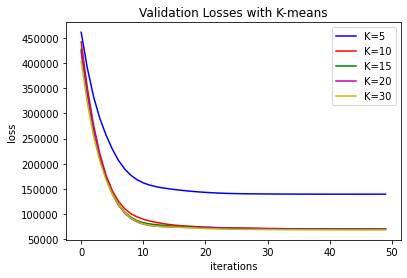

68316.2


In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp

# Loading data
#data = np.load('data2D.npy')
data = np.load('data100D.npy')
[num_pts, dim] = np.shape(data)

is_valid = True
# For Validation set
if is_valid:
  valid_batch = int(num_pts / 3.0)
  np.random.seed(45689)
  rnd_idx = np.arange(num_pts)
  np.random.shuffle(rnd_idx)
  val_data = data[rnd_idx[:valid_batch]]
  data = data[rnd_idx[valid_batch:]]


# Distance function for K-means
def distanceFunc(X, MU):
    # Inputs
    # X: is an NxD matrix (N observations and D dimensions)
    # MU: is an KxD matrix (K means and D dimensions)
    X = tf.expand_dims(X,1)
    MU = tf.expand_dims(MU,0)
    pair_dist = tf.reduce_sum(tf.square(tf.subtract(X, MU)), axis=2)
    # Outputs
    # pair_dist: is the squared pairwise distance matrix (NxK)
    return pair_dist

all_losses = []
#initialize variables and placeholders
for K in [5, 10, 15, 20, 30]:
  X = tf.placeholder("float", (None, dim), name='X')
  MU = tf.Variable(tf.random.truncated_normal(shape=(K, dim),mean=0.0,stddev=1.0))

  clusters = tf.argmin(distanceFunc(X,MU), axis=1)
  loss = tf.reduce_sum(tf.reduce_min(distanceFunc(X,MU),axis=1))
  optiAndMini = tf.train.AdamOptimizer(learning_rate=0.1, beta1=0.9, beta2=0.99, epsilon=1e-5).minimize(loss)

  sess = tf.Session()
  sess.run(tf.global_variables_initializer())

  losses = []
  valid_losses = []

  #training loop
  for i in range(50):
    _, newMU, x_loss, clustering= sess.run([optiAndMini, MU, loss, clusters], feed_dict={X: data})
    if is_valid:
      _, newMUV, v_loss, v_clustering= sess.run([optiAndMini, MU, loss, clusters], feed_dict={X: val_data})
      valid_losses.append(v_loss)
    else:
      _, newMU, x_loss, clustering= sess.run([optiAndMini, MU, loss, clusters], feed_dict={X: data})
      losses.append(x_loss)
  print(valid_losses[-1])
  all_losses.append(valid_losses)
#plot corresponding loss functions
x_range = range(50)

if is_valid:
  plt.plot(x_range, all_losses[0], 'b', x_range, all_losses[1], 'r', x_range, all_losses[2], 'g', x_range, all_losses[3], 'm', x_range, all_losses[4], 'y')
  plt.xlabel('iterations')
  plt.ylabel('loss')
  plt.legend(['K=5', 'K=10', 'K=15', 'K=20', 'K=30'],loc='upper right')
  plt.title("Validation Losses with K-means")
  plt.show()
  print(valid_losses[-1])

else:
  plt.plot(x_range, losses, 'b')
  plt.xlabel('iterations')
  plt.ylabel('loss')
  plt.legend(["Training Loss"],loc='upper right')
  plt.title("Training Losses with K=3")
  plt.show()

#calculate the percentage of data points in each cluster
#percentages = np.zeros(K)
#for k in range(K):
#  percentages[k] = (np.sum(np.equal(k, clustering))/len(clustering))*100
  #print(percentages[k])

#plot the clusters
#plt.title("K-means Clustering with K="+str(K))
#scatter = plt.scatter(data[:, 0], data[:, 1], c=clustering, s=50, alpha=0.5)
#kw = dict(fmt="{x:10}%")
#legend2 = plt.legend(*scatter.legend_elements(**kw),loc='upper right', title="Clusters")
#plt.legend(["Training Loss",'hi'], loc='upper right', title="Clusters")
#plt.plot(newMU[:, 0], newMU[:, 1], 'kx', markersize=15)
#plt.legend()